# Import OpenVisus and Load dataset

In [1]:
# !pip install itkwidgets[all]

In [2]:
import os,sys
import matplotlib.pyplot as plt, skimage
%matplotlib notebook

def ShowData(data,extent):
    fig, ax = plt.subplots()
    im = ax.imshow(data, extent=extent) 
    plt.colorbar(im)
    return fig,im,ax

from openvisus_py import LoadDataset, ExecuteBoxQuery

url=f"http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1&cached=1"
db=LoadDataset(url)
print(f"Loaded dataset \nfields={db.getFields()} \nlogic_box={db.getLogicBox()}")
W,H,D=db.getLogicBox()[1]
access=db.createAccess()


VISUS_BACKEND=cpp
Loaded dataset 
fields=['DATA'] 
logic_box=([0, 0, 0], [2048, 2048, 2048])


# Extract data

In [3]:
result=list(ExecuteBoxQuery(db,
                            access=access,
                            logic_box=[[0,0,0],[W,H,D]],
                            endh=21,
                            num_refinements=1))[0]
data=result['data']
print(f"Got data shape={data.shape} dtype={data.dtype}")

Got data shape=(128, 128, 128) dtype=uint8


# Show volume in itkwidgets


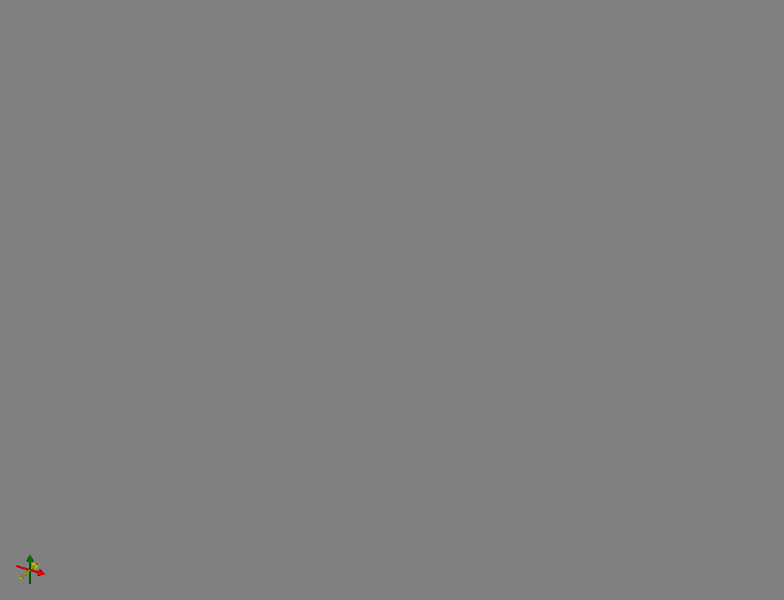
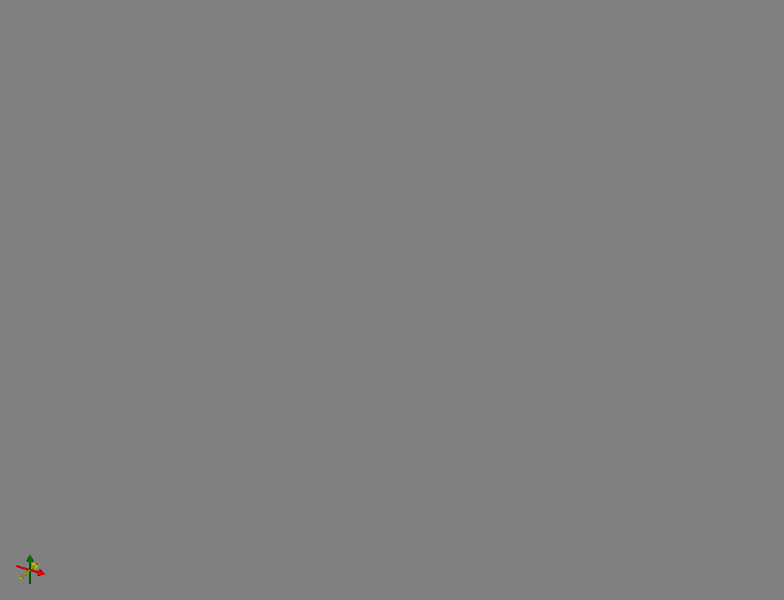

<IPython.core.display.Javascript object>

In [4]:
from itkwidgets import view
view(data)